Sentence Transformer:
SentenceTransformers 🤗 is a Python framework for state-of-the-art sentence, text and image embeddings.

[Hugging Face](https://huggingface.co/sentence-transformers)

[SentenceTransformers Documentation](https://www.sbert.net/)

# Important:
[Usage (Sentence-Transformers)](https://huggingface.co/sentence-transformers/clip-ViT-B-32-multilingual-v1)

[Image Search](https://www.sbert.net/examples/applications/image-search/README.html)


In [1]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=d55c551de289d307f42db150f00f7deaa9e3a69e35e924d8b4564e0877d6f95c
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


# Dataset:

[Roboflow](https://universe.roboflow.com/roboflow-100/animals-ij5d2/dataset/2)

In [2]:
data_path = "/content/drive/MyDrive/Colab_Notebooks/GenerativeAI/CLIP/text_to_image/animals/"

In [3]:
import os
os.listdir(data_path)

['176_jpg.rf.d3235ad37d99fd5a7e3fe816e5d21c8c.jpg',
 '38_jpg.rf.d101c11a1e1b9c24586cf9bb3c00dbc2.jpg',
 '608_jpg.rf.550bb768f142dfd2368db45c84c890ee.jpg',
 '908_jpg.rf.7e653cf62553cdb52c11aee67507ab32.jpg',
 '279_jpg.rf.f3679ab2890c702d7692e279a886ddd3.jpg',
 '614_jpg.rf.4d219e0a4b5a1df2a84afe6ae3a2d256.jpg',
 '870_jpg.rf.b42ef509228c416edd11a3e3eef43748.jpg',
 '18_jpg.rf.b1ef2be0c20e760d2cdc575f76e7396f.jpg',
 '47_jpg.rf.0124d61ebcadbc22e58576323ddfca0c.jpg',
 '370_jpg.rf.c1dd40fc864b7bb20b33e50120347903.jpg',
 '295_jpg.rf.531a0cab15612e2a86569b050ba44c5f.jpg',
 '248_jpg.rf.a076f5d1a7e954db5b0c3bc19bc3a367.jpg',
 '612_jpg.rf.ef7f40e6d6c019bb68f9c4db79db9dc0.jpg',
 '190_jpg.rf.adc2930246a9c0739645375a471cdd21.jpg',
 '793_jpg.rf.ca5970452d6710f8ebd5881f6848c52b.jpg',
 '599_jpg.rf.798216e500e07ea59f04142d2b77af38.jpg',
 '492_jpg.rf.56968d9cc3e52cf7b3169cf4af669c94.jpg',
 '967_jpg.rf.fb421140ad5773f61ca9133e6bf709d5.jpg',
 '982_jpg.rf.6e507955a36f7b94b1f6118f4b81ae2b.jpg',
 '438_jpg.rf.10

In [4]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Model:

https://huggingface.co/sentence-transformers/clip-ViT-B-32

In [6]:
model = SentenceTransformer('clip-ViT-B-32')

# Image embeddings.

In [7]:
img_model = SentenceTransformer('clip-ViT-B-32')

In [8]:
img_names = list(glob.glob(f'{data_path}*.jpg'))

print("Images:", len(img_names))

Images: 1000


[Properties and methods when you load a SentenceTransformer model](https://www.sbert.net/docs/package_reference/SentenceTransformer.html)

# Map images to the vector space

In [9]:
img_emb = img_model.encode(
                            [Image.open(filepath) for filepath in img_names],
                            batch_size=128,
                            convert_to_tensor=True,
                            show_progress_bar=True
                            )

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

In [10]:
img_emb.shape

torch.Size([1000, 512])

In [11]:
type(img_emb)

torch.Tensor

# Search function.

In [12]:
def plot_images(images, query, n_row=2, n_col=2):
    _, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
    axs = axs.flatten()

    for img, ax in zip(images, axs):
        ax.set_title(query)
        ax.imshow(img)

    plt.savefig('foo.png')
    plt.show()

# Compute cosine similarities:

In [15]:
def search(query, k=4):
    # First, we encode the query (which can either be an image or a text string)
    query_emb = model.encode([query],
                             convert_to_tensor=True,
                             show_progress_bar=False)

    # Then, we use the util.semantic_search function, which computes the cosine-similarity
    # between the query embedding and all image embeddings.
    # It then returns the top_k highest ranked images, which we output
    hits = util.semantic_search(query_emb, img_emb, top_k=k)[0]
    print(hits)

    matched_images = []
    for hit in hits:
        matched_images.append(Image.open(img_names[hit['corpus_id']]))

    plot_images(matched_images, query)
    # print(matched_images)


person,chicken,cow,goat,horse,dog,racoon,cat,fox,skunk

[{'corpus_id': 531, 'score': 0.33257243037223816}, {'corpus_id': 129, 'score': 0.32132625579833984}, {'corpus_id': 179, 'score': 0.3173733055591583}, {'corpus_id': 626, 'score': 0.3155703544616699}]


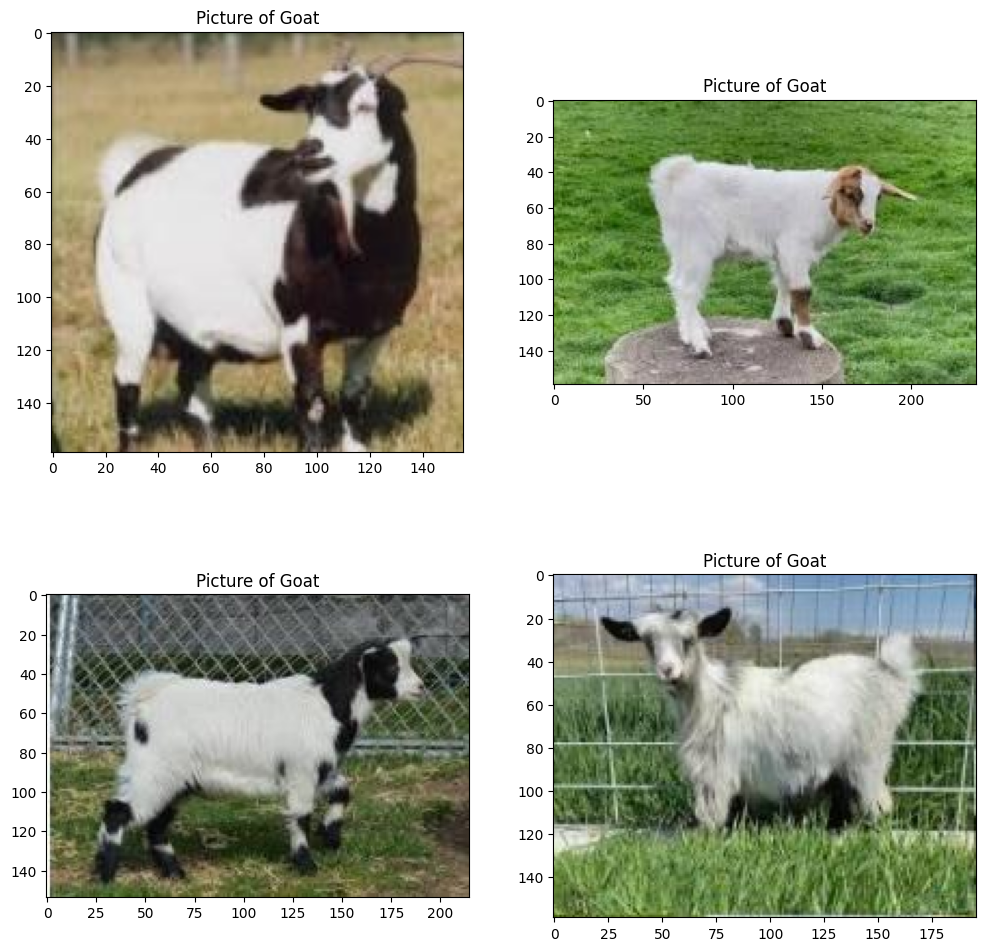

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=156x159 at 0x7A25C8E36290>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=237x159 at 0x7A25C8E34430>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=215x154 at 0x7A25C8E362C0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=196x159 at 0x7A25C8E37DC0>]


In [16]:
search("Picture of Goat")